# **Import packages**

In [ ]:
import numpy as np
import struct
from array import array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model
import random
from google.colab import drive

# **Load MNIST Dataset**

1.   Load a subset of the MNIST dataset ( It's a large dataset of handwritten digits ) using TensorFlow's Keras API, containing only 5000 training samples and 1000 test samples, and assign the training and testing data along with their corresponding labels to (x_train_full, y_train_full) and (x_test_full, y_test_full) respectively.
2.   Call the show_images function to display the first 10 training images from the subset of 5000 samples with their labels.
3.   We preprocess grayscale images from the MNIST dataset by converting them to RGB format and resizing them to (224, 224) dimensions to match the input size required by the pre-trained VGG16 model. Next, we convert the labels into one-hot encoded format.



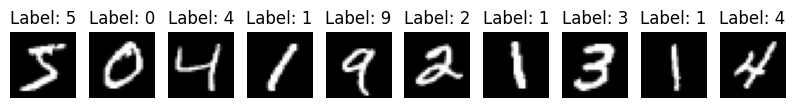

In [4]:
def show_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title("Label: {}".format(labels[i]))
        plt.axis('off')
    plt.show()

(x_train_full, y_train_full), (x_test_full, y_test_full) = tf.keras.datasets.mnist.load_data()

x_train = x_train_full[:5000] / 255.0
y_train = y_train_full[:5000]

x_test = x_test_full[:1000] / 255.0
y_test = y_test_full[:1000]

show_images(x_train, y_train, num_images=10)

# **VGG16 Transfer Learning for MNIST Classification**

We utilize the VGG16 model, pretrained on ImageNet dataset, as a feature extractor within a Sequential model, followed by additional fully connected layers for classification. After compiling the model with Adam optimizer and categorical cross-entropy loss, we train it on the preprocessed data for 3 epochs. Finally, we evaluate the model's accuracy on the test set and plot the training history, visualizing the accuracy over epochs for both training and validation datasets.


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/3
157/157 [==============================] - 3194s 20s/step - loss: 1.1447 - accuracy: 0.6618 - val_loss: 0.2188 - val_accuracy: 0.9660
Epoch 2/3
157/157 [==============================] - 3152s 20s/step - loss: 0.4593 - accuracy: 0.8372 - val_loss: 0.1600 - val_accuracy: 0.9560
Epoch 3/3
32/32 [==============================] - 511s 16s/step - loss: 0.1105 - accuracy: 0.9770
Test accuracy: 0.9769999980926514


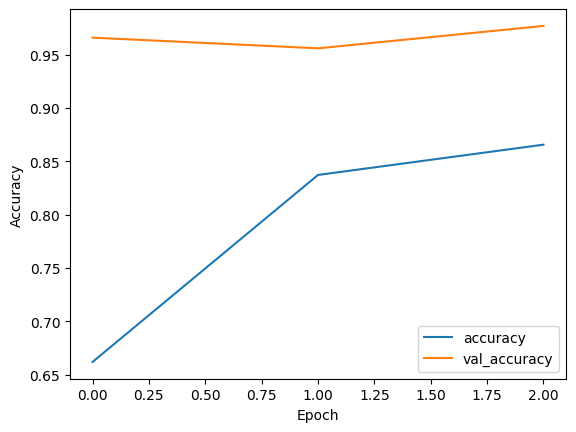

In [ ]:
# convert the grayscale images into RGB format
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=-1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))

# Resize images to (224, 224) to match VGG16 input size
x_train = tf.image.resize(x_train, (224, 224))
x_test = tf.image.resize(x_test, (224, 224))

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define pre-trained VGG16 model
base_model = VGG16(input_shape=(224, 224, 3),
                   include_top=False,
                   weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# compile our model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Saving the model**


In [ ]:
# Save the model to Google Drive
model.save('/content/drive/MyDrive/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Image Prediction with our model**
We load our model stored in Google Drive, randomly we select an image and its corresponding label from the test dataset, resize the image to match the input size expected by the model (224x224 pixels), and make a prediction using the loaded model. Finally, we plot the selected image along with the true label and the predicted label for visualization.

1/1 [==============================] - 1s 730ms/step


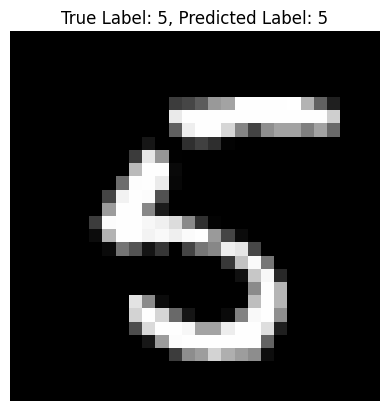

In [5]:
# Load the model from Google Drive
model_path = '/content/my_model.h5'
loaded_model = load_model(model_path)

# Choose a random index
random_index = random.randint(0, len(x_test) - 1)

# Select a random image and corresponding label
image = x_test[random_index]
label = y_test[random_index]

# Convert the grayscale image to RGB
image_rgb = np.stack((image,)*3, axis=-1)

# Resize the image to match the input size expected by the model
resized_image = tf.image.resize(image_rgb, [224, 224])

# Reshape the image to have a batch dimension
resized_image = np.expand_dims(resized_image, axis=0)

# Make prediction
prediction = loaded_model.predict(resized_image)

# Get predicted label
predicted_label = np.argmax(prediction)

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f"True Label: {label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

1/1 [==============================] - 1s 848ms/step


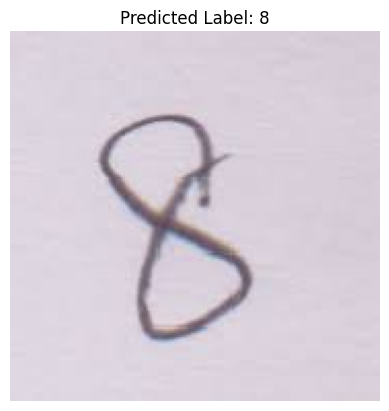

In [6]:
# Path to the image you want to use for prediction
image_path = '/content/8.jpg'

# Load the image
image = plt.imread(image_path)

# Convert the grayscale image to RGB if necessary
if len(image.shape) == 2:  # Check if image is grayscale
    image_rgb = np.stack((image,)*3, axis=-1)
else:
    image_rgb = image

# Resize the image to match the input size expected by the model
resized_image = tf.image.resize(image_rgb, [224, 224])

# Reshape the image to have a batch dimension
resized_image = np.expand_dims(resized_image, axis=0)

# Make prediction
prediction = loaded_model.predict(resized_image)

# Get predicted label
predicted_label = np.argmax(prediction)

# Plot the image
plt.imshow(image, cmap='gray')  # Display the original grayscale image
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()